<a href="https://colab.research.google.com/github/changsksu/KState_IMSE541/blob/main/Lab3_One_Way_ANOVA_Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This Python notebook demonstrates the computation of One-Way ANOVA.
The example is from Montgomery Intro to SQC (7th ed chap 4). Paper strength by hardwood concentration. Ref.
https://www.pythonfordatascience.org/anova-python/
https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html

# Data

In [ ]:
import math
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/changsksu/KState_IMSE541/main/paper%20strength%20one-way%20ANOVA.csv', sep=',', na_values=".")
data

,Obs,Conc,Strength
0,1,5,7
1,2,5,8
2,3,5,15
3,4,5,11
4,5,5,9
5,6,5,10
6,1,10,12
7,2,10,17
8,3,10,13
9,4,10,18


In [ ]:
# filter out 5% hardwood concentration and validate it
Conc5=data[data['Conc']==5]['Strength']
Conc5

,Strength
0,7
1,8
2,15
3,11
4,9
5,10


In [ ]:
# another way for filtering
conc5=data['Strength'][data['Conc'] == 5]
conc5

0     7
1     8
2    15
3    11
4     9
5    10
Name: Strength, dtype: int64

In [ ]:
#x5_bar
statistics.mean(conc5)

10

In [ ]:
np.mean(conc5)

10.0

In [ ]:
statistics.stdev(conc5)

2.8284271247461903

In [ ]:
np.std(conc5, ddof=1)

2.8284271247461903

In [ ]:
# filter out all other concentration
Conc10=data[data['Conc']==10]['Strength']
Conc15=data[data['Conc']==15]['Strength']
Conc20=data[data['Conc']==20]['Strength']

# run one way anova using scipy f_onway function

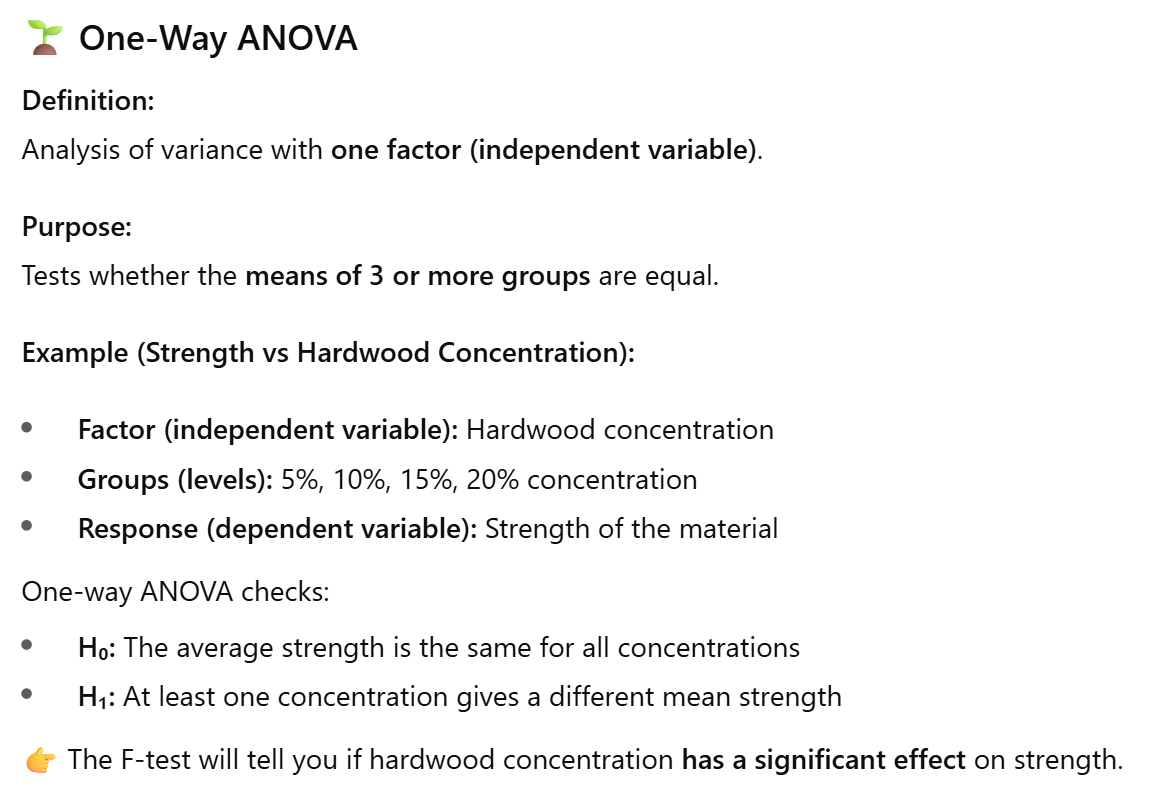

In [ ]:
# run one way anova using scipy f_onway function
# make sure Conc is capital on the first letter; varaible name is case sensitive!

#stat → the F-statistic.

#This is the ratio of variance between groups to variance within groups.

#A larger value for  F-statistic  means stronger evidence that not all group means are equal.
#If p < α (commonly 0.05), you reject H₀ and conclude that at least one group mean is different.

stat, p=f_oneway(Conc5, Conc10, Conc15, Conc20 )
print('stat=%.3f, p=%.3f' %(stat,p))



stat=19.605, p=0.000


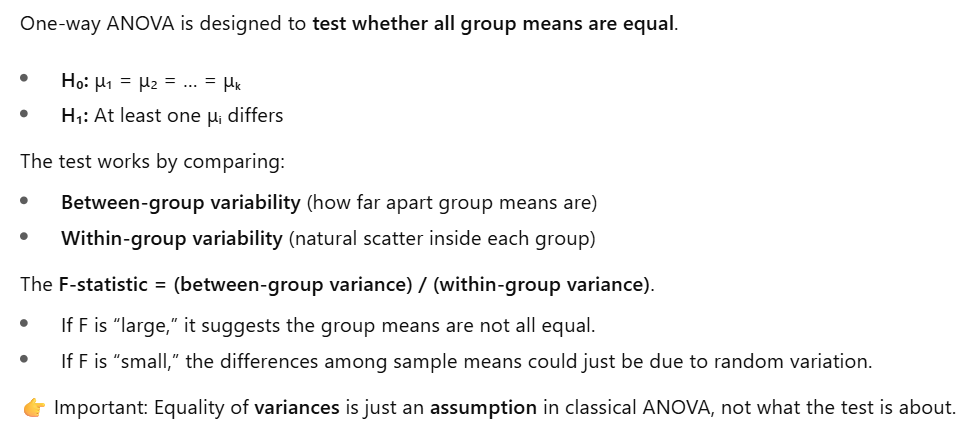

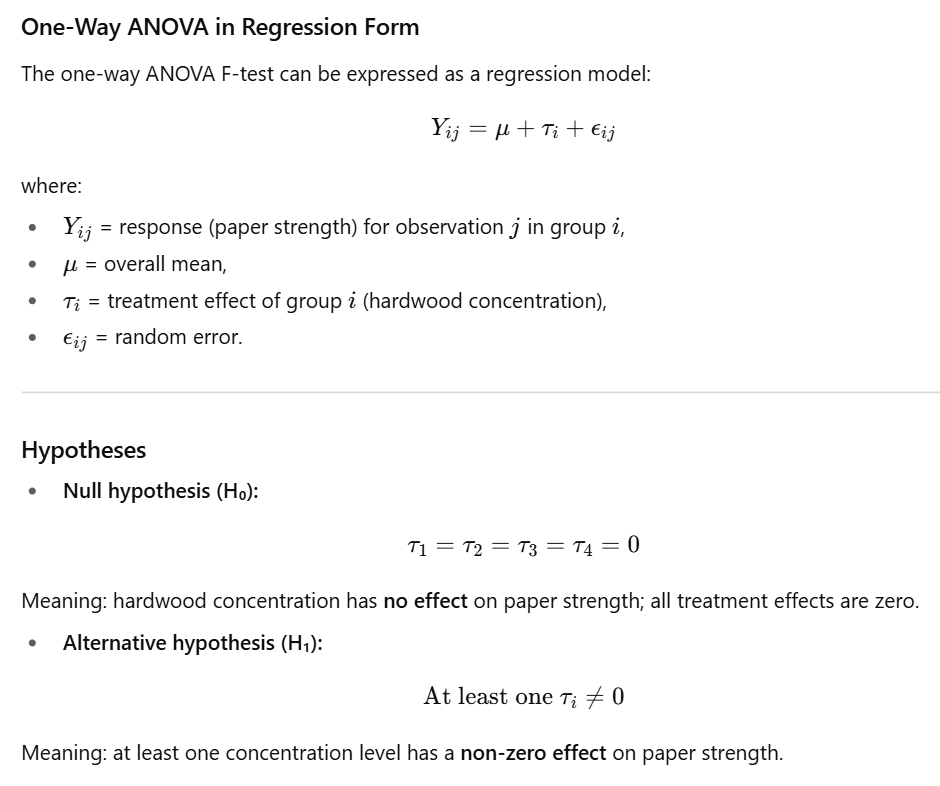

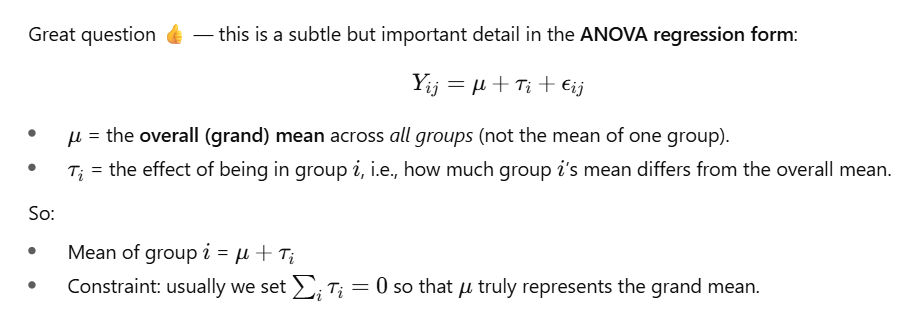

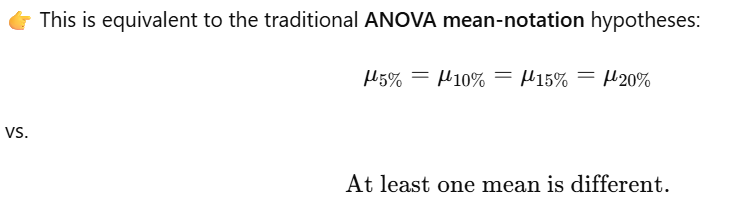

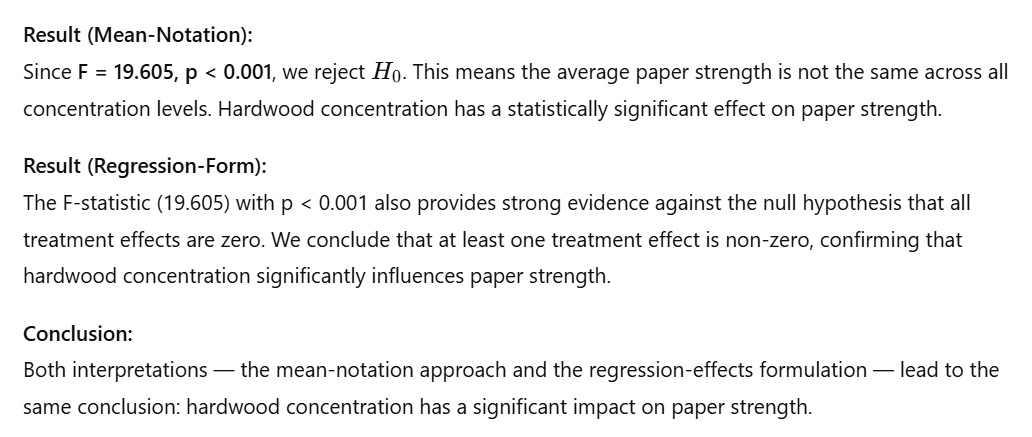

# OLS Model for One Factor Analysis

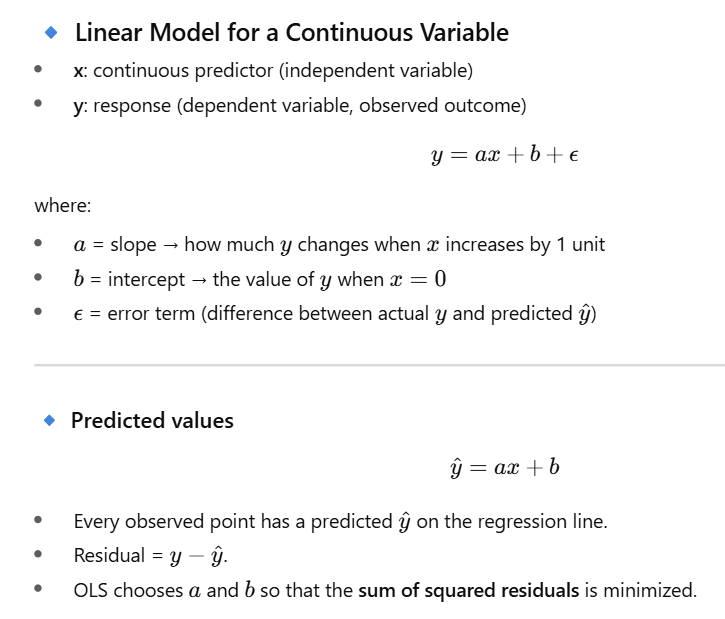

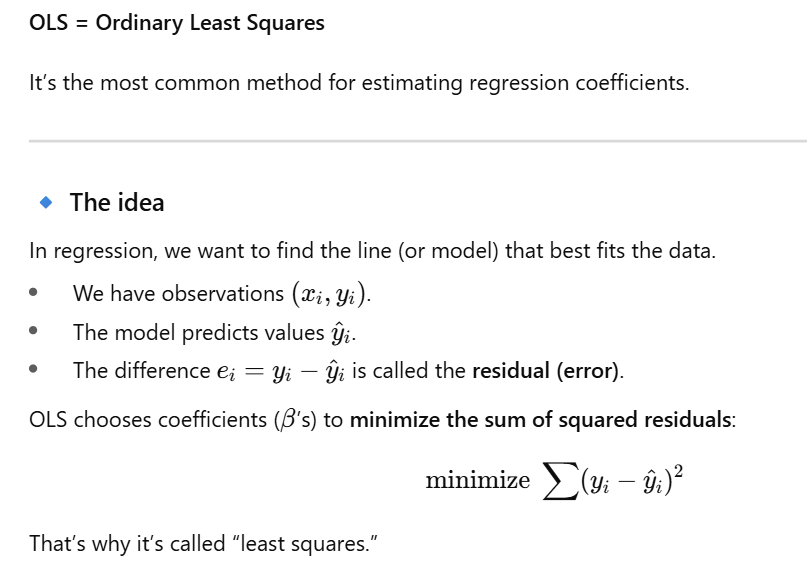

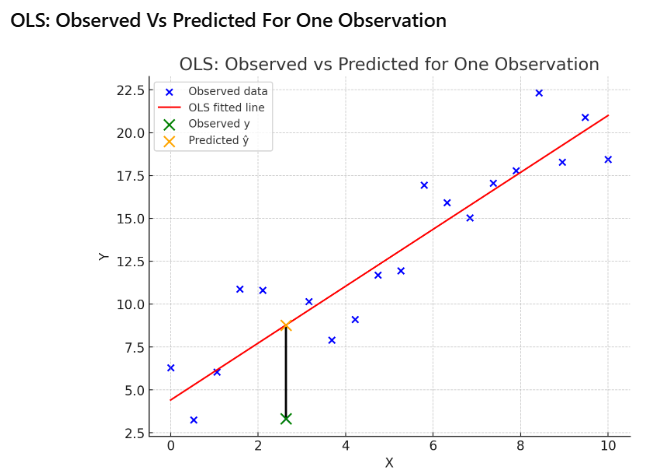

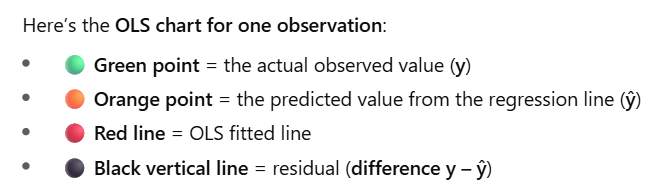

now our data is categorical data with four groups

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Example data: paper strength values for 4 concentration levels
Conc5  = [7, 8, 15, 11, 9, 10]
Conc10 = [12, 17, 13, 18, 19, 15]
Conc15 = [14, 18, 19, 17, 16, 18]
Conc20 = [19, 25, 22, 23, 18, 20]

# Combine into a dataframe
df = pd.DataFrame({
    "strength": Conc5 + Conc10 + Conc15 + Conc20,
    "conc": (["5%"]*len(Conc5) +
             ["10%"]*len(Conc10) +
             ["15%"]*len(Conc15) +
             ["20%"]*len(Conc20))
})

df

,strength,conc
0,7,5%
1,8,5%
2,15,5%
3,11,5%
4,9,5%
5,10,5%
6,12,10%
7,17,10%
8,13,10%
9,18,10%


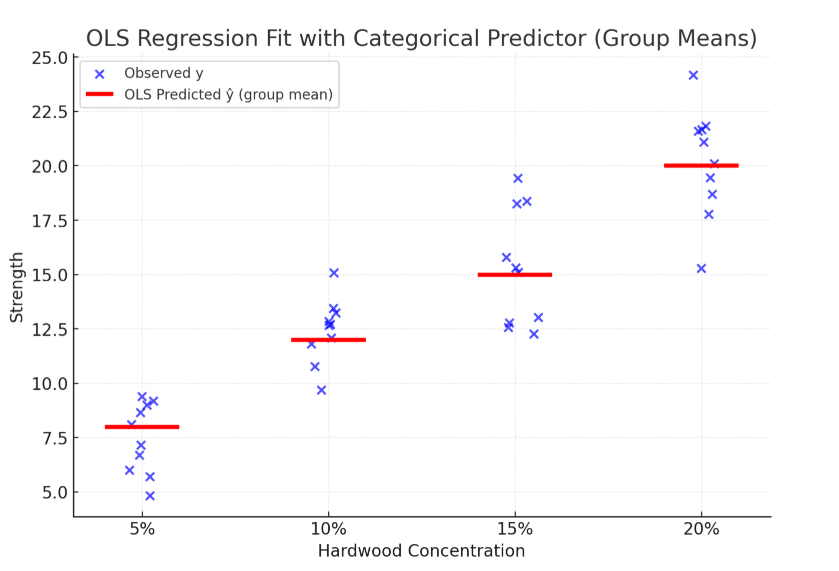

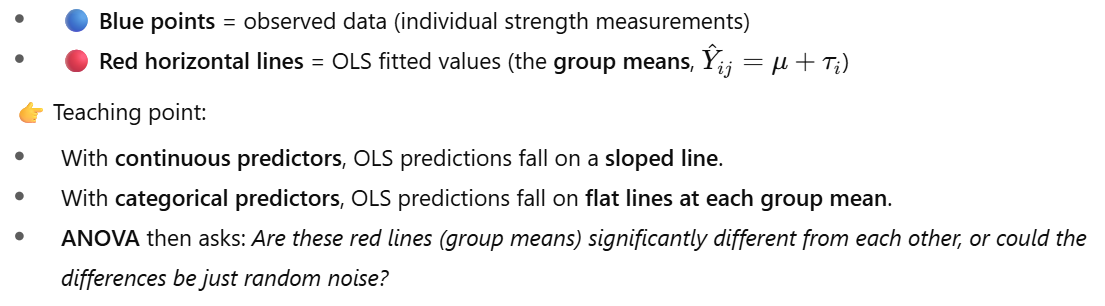

In [ ]:

# Run regression model (ANOVA as regression with dummies)
#ols: ordinary least squres, we fit model with ols to minimize sume of squerd residuals
#OLS chooses the line (or curve, or group means if categorical) that makes the sum of squared vertical distances between
# the observed data points and the predicted values as small as possible.
model = smf.ols("strength ~ C(conc)", data=df).fit()

# Show ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
# one factor (conc). Type I, II, III all give the same result in a one-way ANOVA
#but when you have two factor by changing types you can discusse about interaction effect between factores.
#when you have multiple factors (e.g., strength ~ C(conc) + C(temp) + C(conc):C(temp)) that Type I, II, III start giving different results.
print(anova_table)

# Show regression coefficients (treatment effects τ’s)
print(model.summary())


#OLS step → fits the group means.

#ANOVA step → tests if those group means are significantly different.
# OLS fit → Predicted group means → ANOVA test → Are means equal or not?

              sum_sq    df          F    PR(>F)
C(conc)   382.791667   3.0  19.605207  0.000004
Residual  130.166667  20.0        NaN       NaN
                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           3.59e-06
Time:                        04:01:44   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0

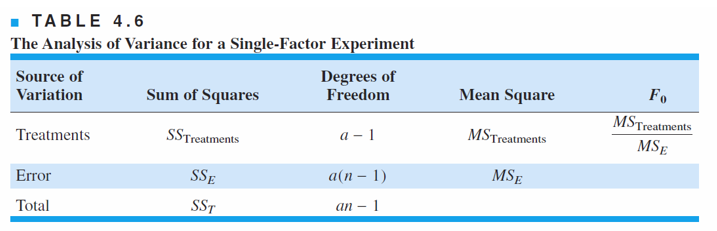

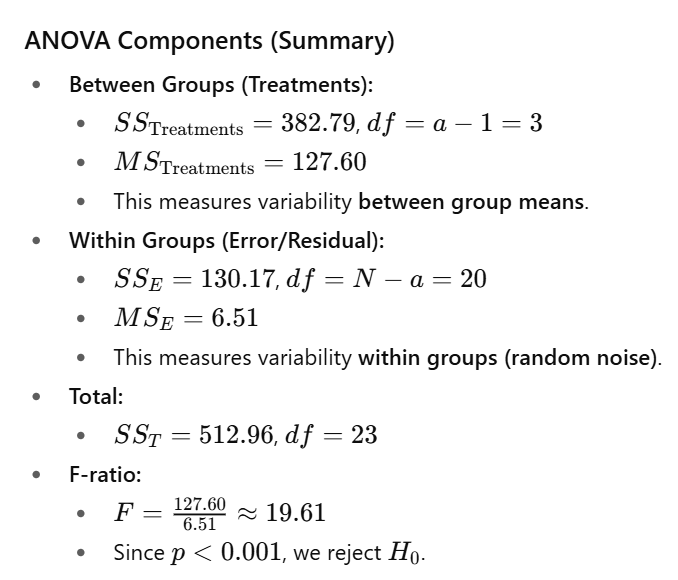

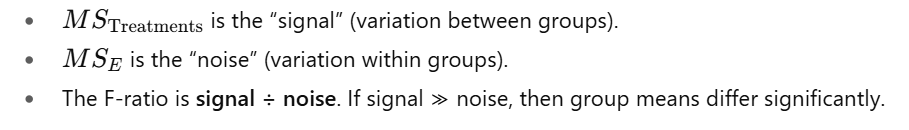

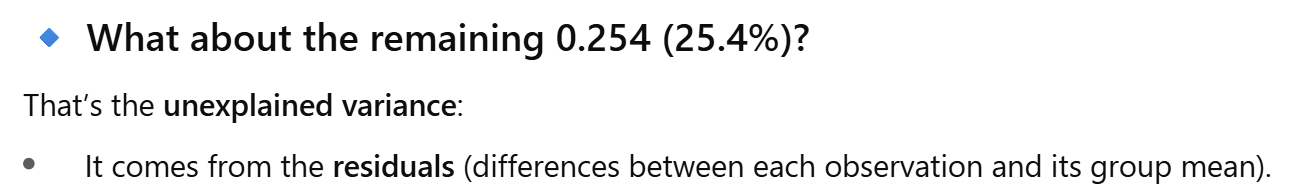

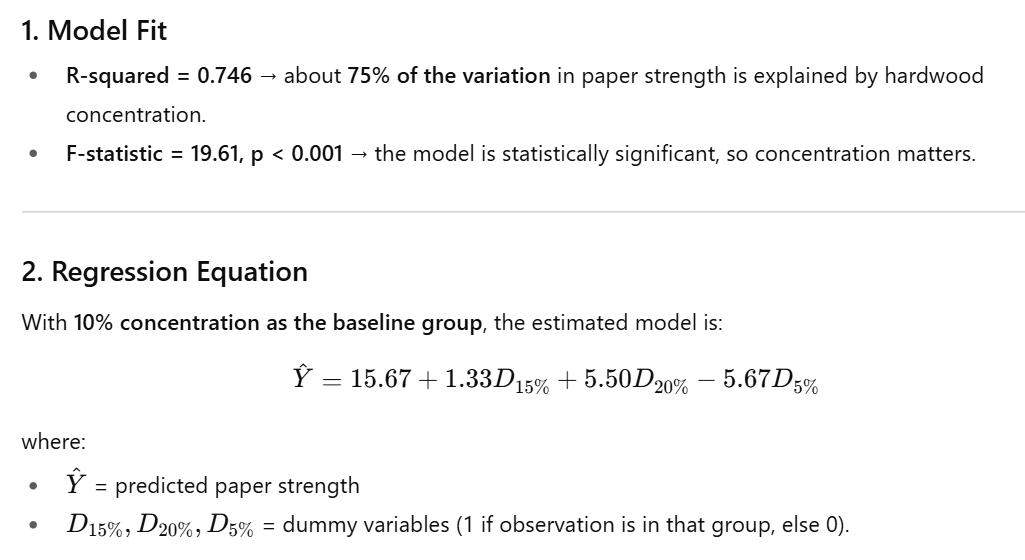

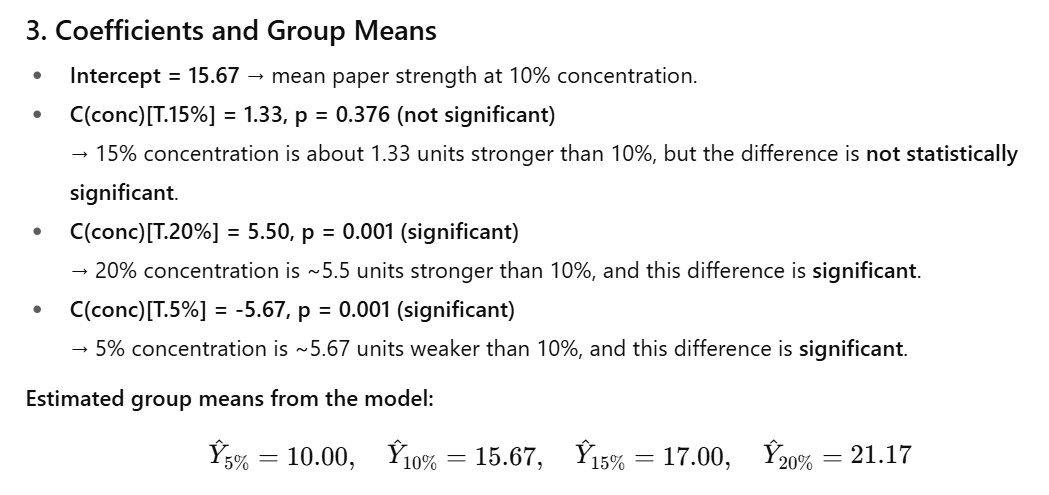


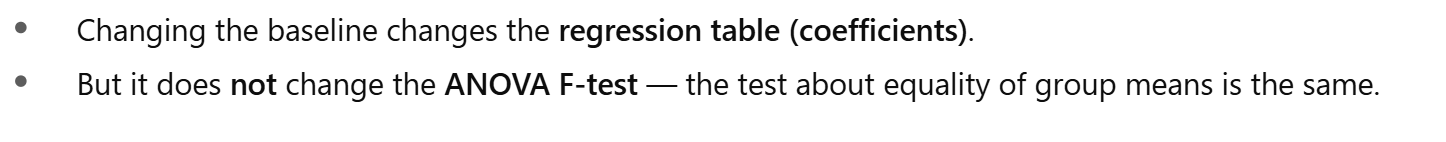

In [ ]:
df["conc"] = pd.Categorical(df["conc"], categories=["5%", "10%", "15%", "20%"])
model = smf.ols("strength ~ C(conc, Treatment(reference='5%'))", data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           3.59e-06
Time:                        05:02:57   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                                        sum_sq    df          F    PR(>F)
C(conc, Treatment(reference='5%'))  382.791667   3.0  19.605207  0.000004
Residual                            130.166667  20.0        NaN       NaN


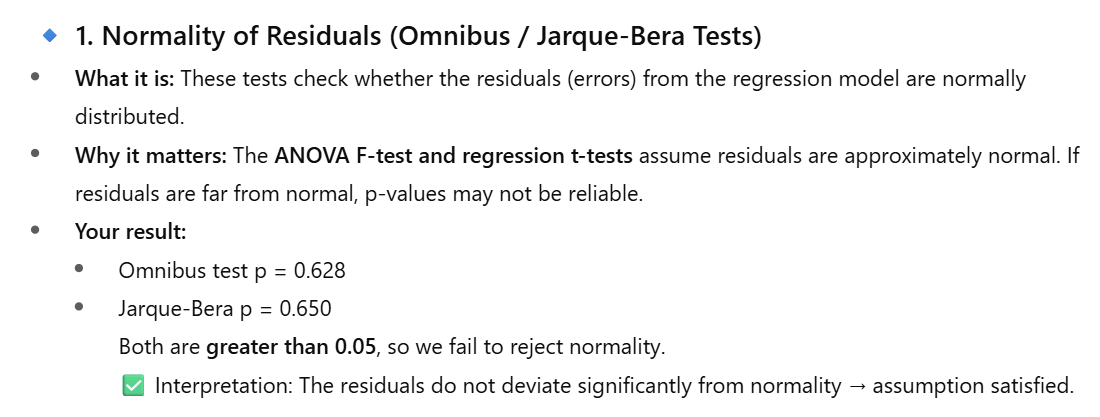

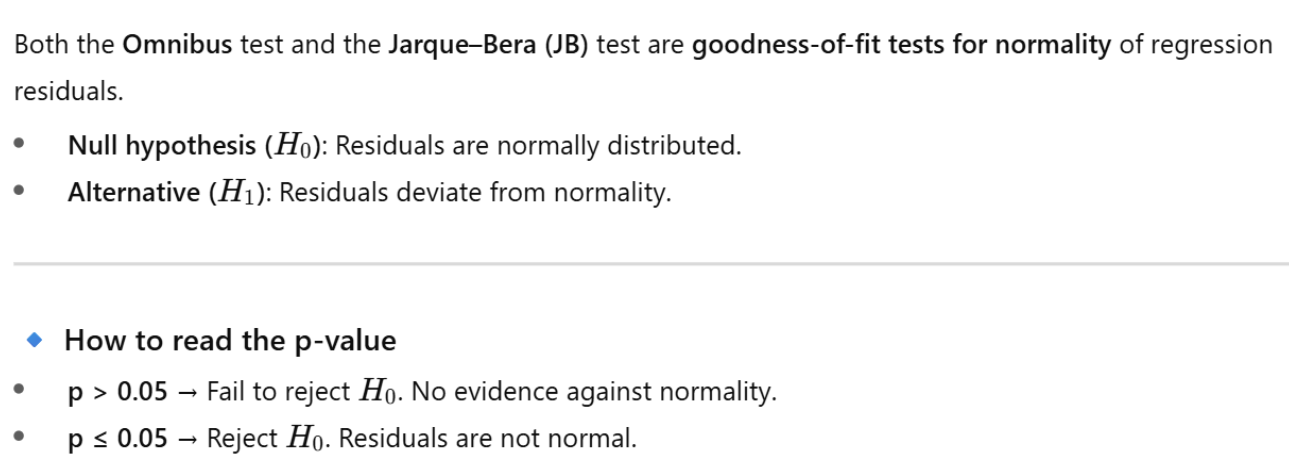

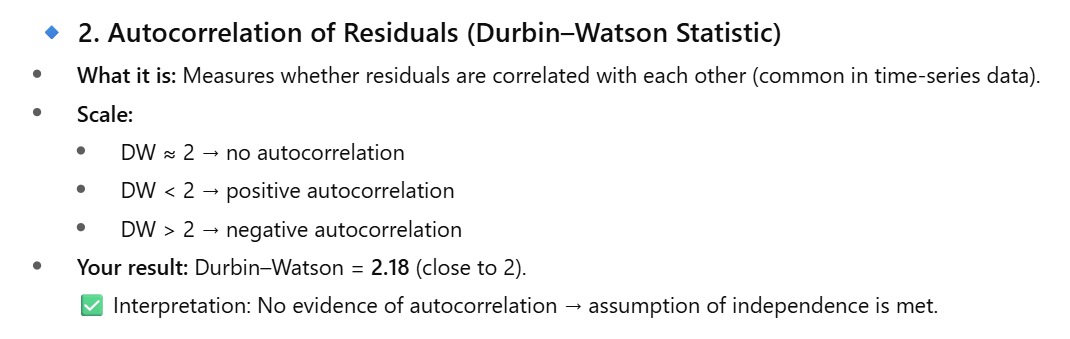

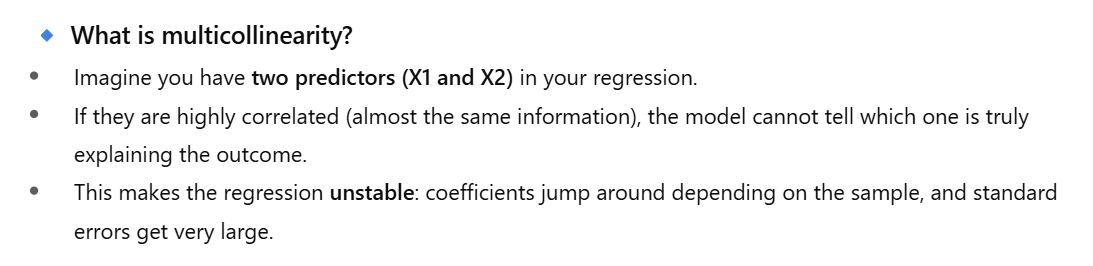

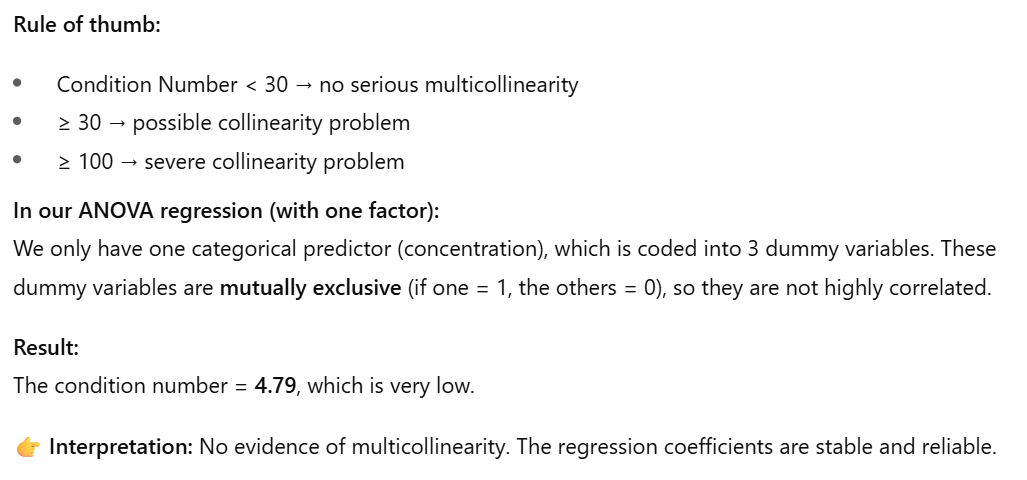

A measure for evaluating models. Sometimes we build a model that has only one factor, sometimes we build a model that has two factors(concentration and tempreture), and then we have to compare which model fits the data better. by using log-likelihood and AIC and BIC comparision is easy

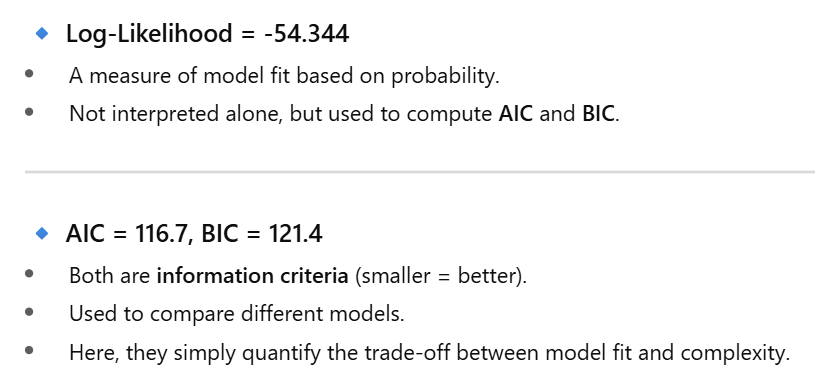

In [ ]:
df=data #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Obs       24 non-null     int64
 1   Conc      24 non-null     int64
 2   Strength  24 non-null     int64
dtypes: int64(3)
memory usage: 708.0 bytes


In [ ]:
# To generate anova table using the ols model from statsmodel

model = ols('Strength ~ C(Conc)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Conc),382.791667,3.0,19.605207,0.000004
Residual,130.166667,20.0,NaN,NaN


In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           3.59e-06
Time:                        23:12:45   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.0000      1.041      9.602

In [ ]:
# the prediction is actually Yi_ bar, i=1,2, ..., a (number of treatments) for all observations
# for example conc=5% has 6 obs at the same values, etc
strength_predict=model.predict()
strength_predict

array([10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 15.66666667, 15.66666667, 15.66666667, 15.66666667,
       15.66666667, 15.66666667, 17.        , 17.        , 17.        ,
       17.        , 17.        , 17.        , 21.16666667, 21.16666667,
       21.16666667, 21.16666667, 21.16666667, 21.16666667])

In [ ]:
# Compute ANOVA table with MSE
# This is a more simplified version of the OLS summary table
"""
The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
"""

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F)
C(Conc),382.791667,3.0,127.597222,19.605207,0.000004
Residual,130.166667,20.0,6.508333,NaN,NaN


MSE=mean_sq of Residual, in this case MSE=6.5

In [ ]:
# R-squared value
model.rsquared

np.float64(0.7462431971407685)

In [ ]:
# Adjusted R-squared value
model.rsquared_adj

np.float64(0.7081796767118838)

In [ ]:
# get residuals
residuals = model.resid

# round to 3 decimals and print
print(residuals.round(3))
# 7 first observation (from conc 5%)  minus   10 first prediction (from conc 5%)

0    -3.000
1    -2.000
2     5.000
3     1.000
4    -1.000
5    -0.000
6    -3.667
7     1.333
8    -2.667
9     2.333
10    3.333
11   -0.667
12   -3.000
13    1.000
14    2.000
15    0.000
16   -1.000
17    1.000
18   -2.167
19    3.833
20    0.833
21    1.833
22   -3.167
23   -1.167
dtype: float64


# Model Validation and Residual Analysis

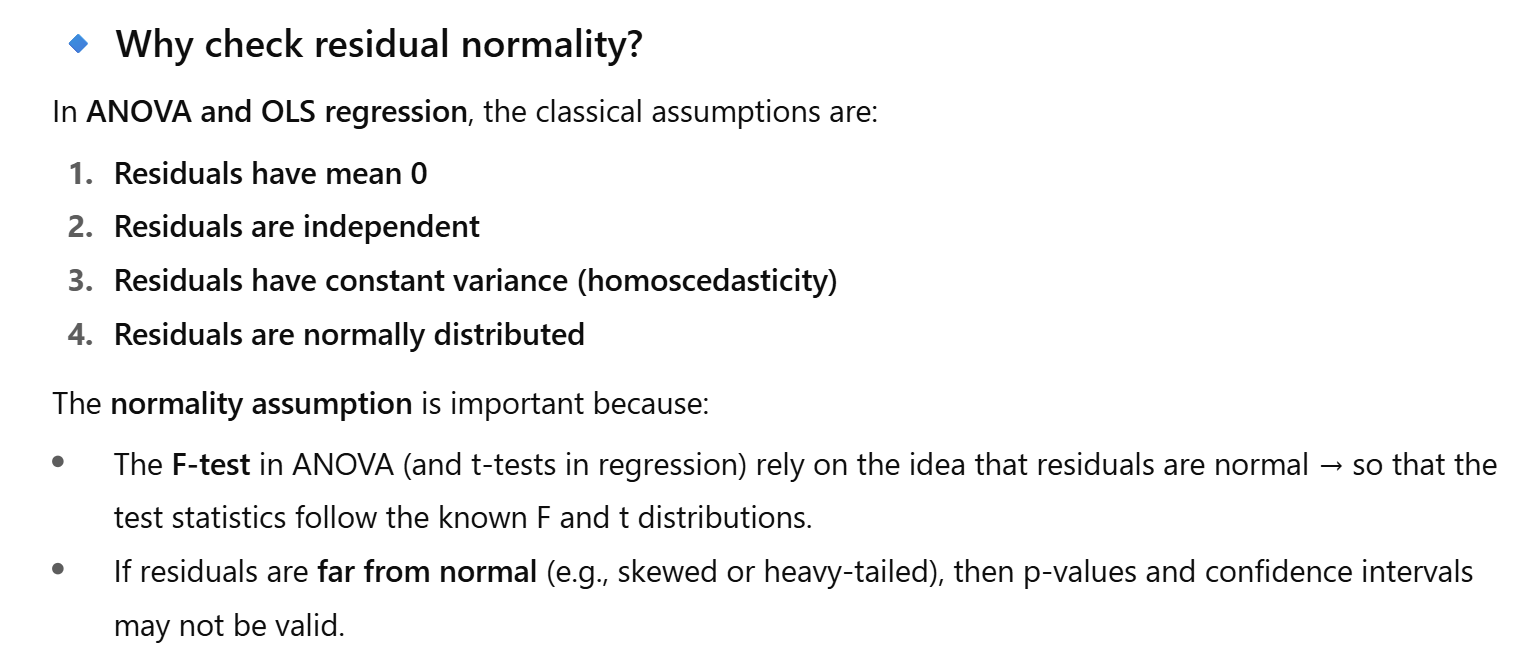

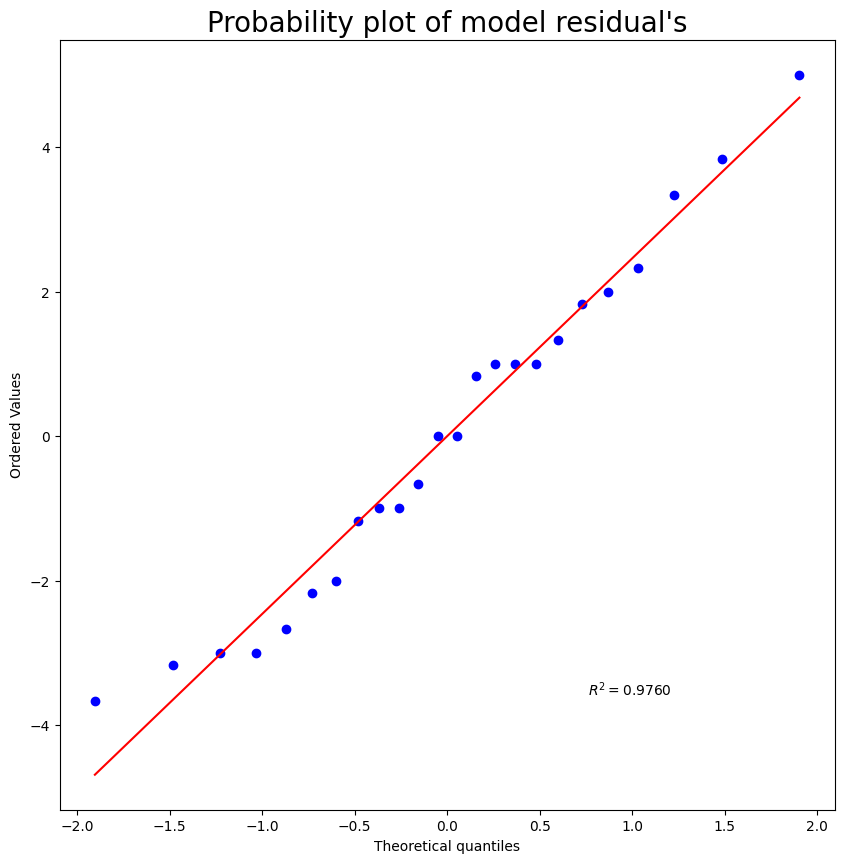

In [ ]:
# Residual Analysis
# normal check
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

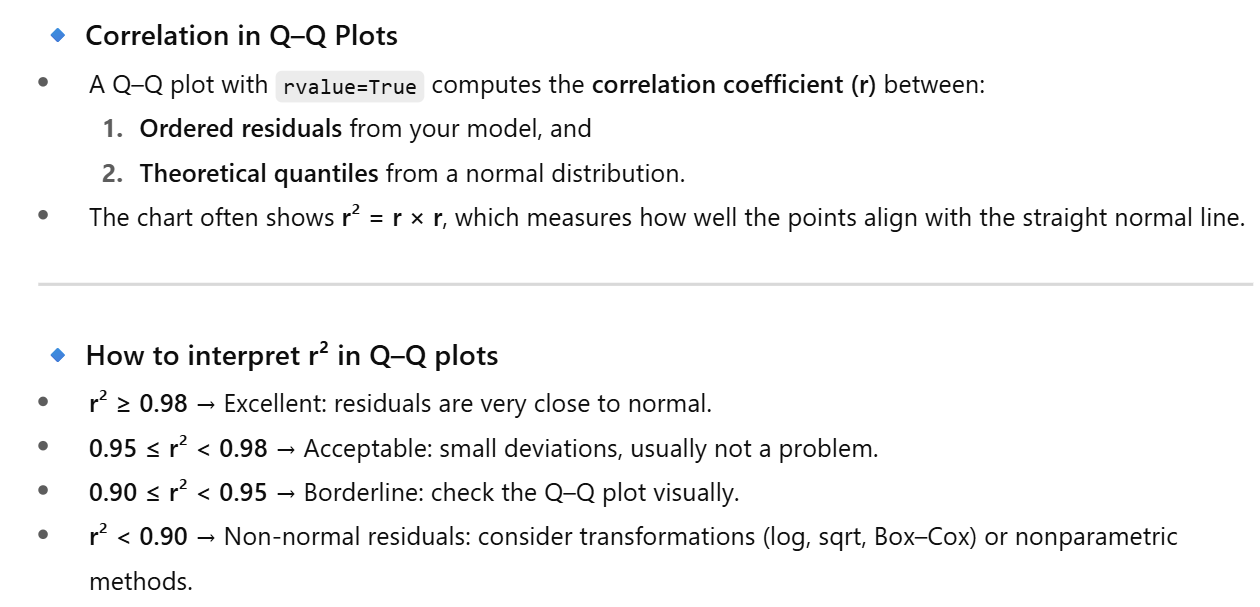

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

# Residuals
residuals = model.resid

# --- Shapiro-Wilk Test ---
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: W={shapiro_stat:.3f}, p={shapiro_p:.3f}")



Shapiro-Wilk Test: W=0.966, p=0.576


In [ ]:
# Homogeneity of Variance check
# Levene() method

stats.levene(df['Strength'][df['Conc'] == 5],
             df['Strength'][df['Conc'] == 10],
             df['Strength'][df['Conc'] == 15],
             df['Strength'][df['Conc'] == 20])

LeveneResult(statistic=0.5988455988455988, pvalue=0.6231941028644978)

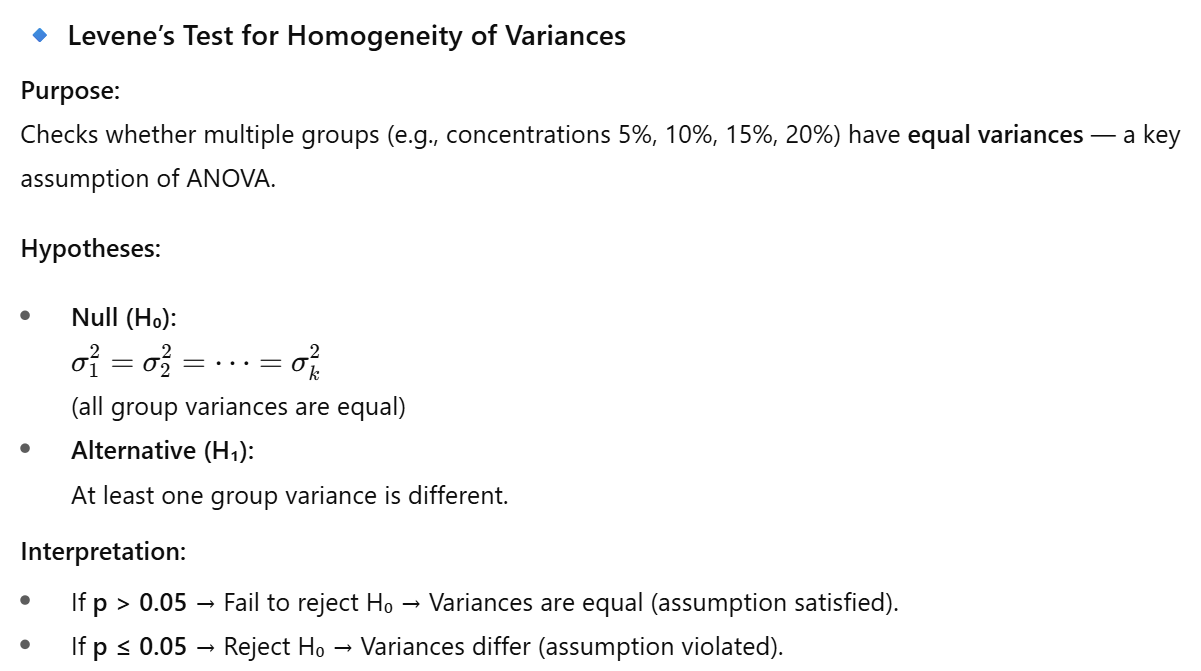

The p value of the Levene is very large. We don't have evidence to conclude that the variances from different hardwood concentration are different

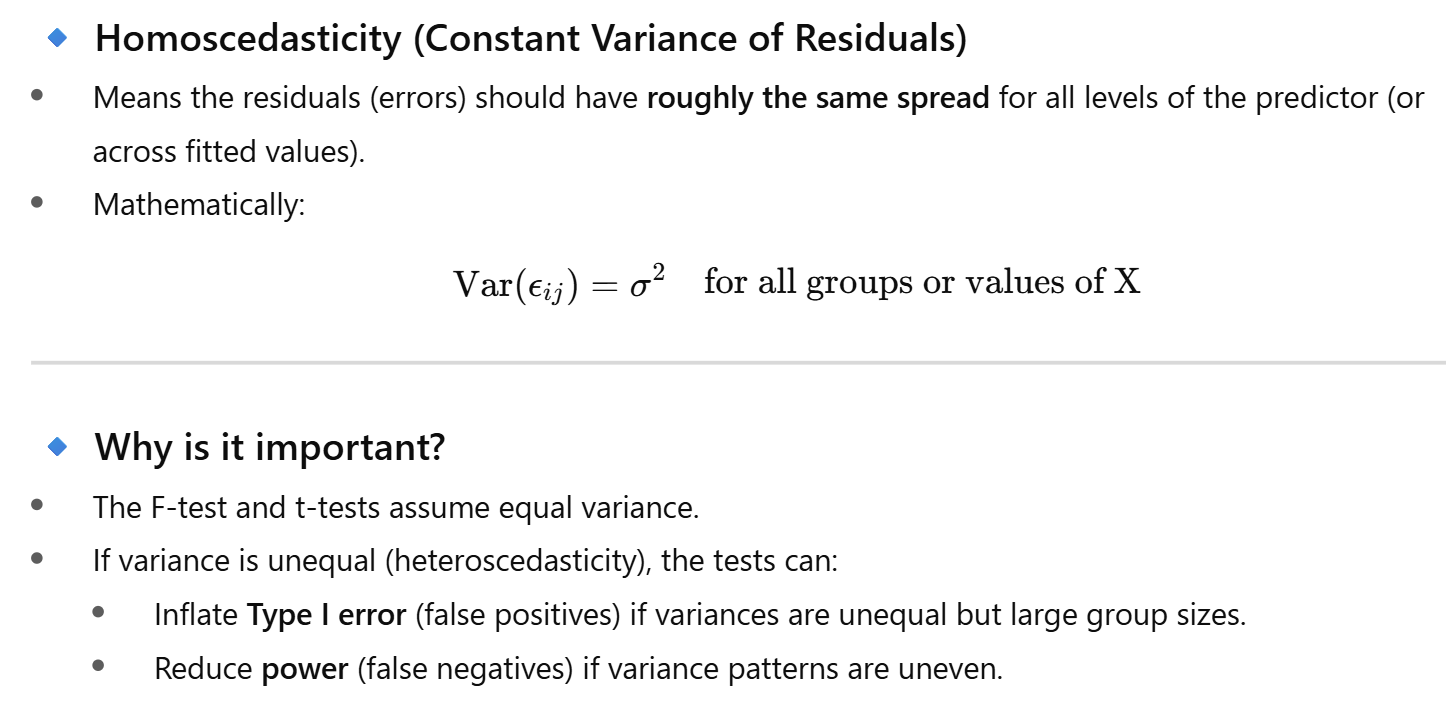

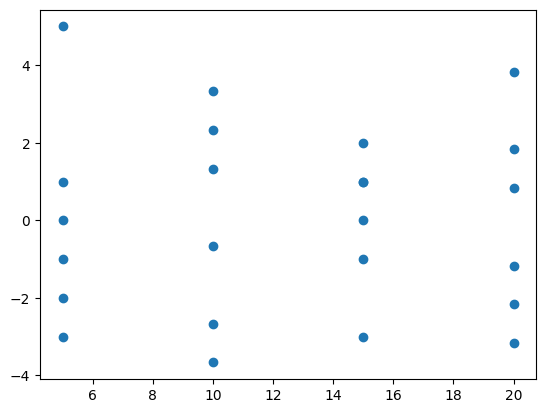

In [ ]:
# Plot fo residuals vs factor levels (e.g different treatments)
import matplotlib.pyplot as plt

treatment=data['Conc']

plt.scatter(treatment, residuals)

plt.show()

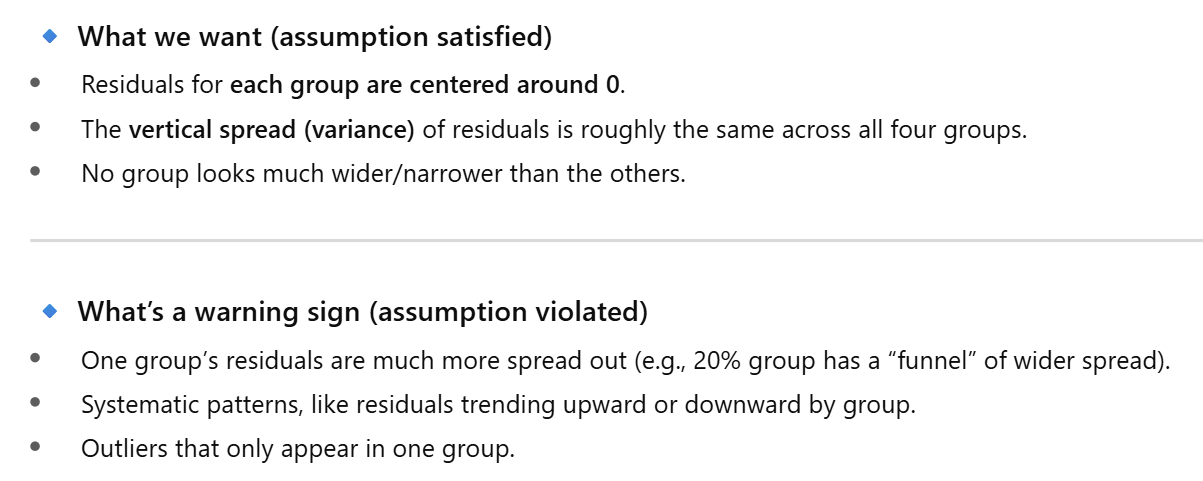

To visualized constant variance assumption, observe the length of each bar of similar length. Apply both scatter plots above and below.

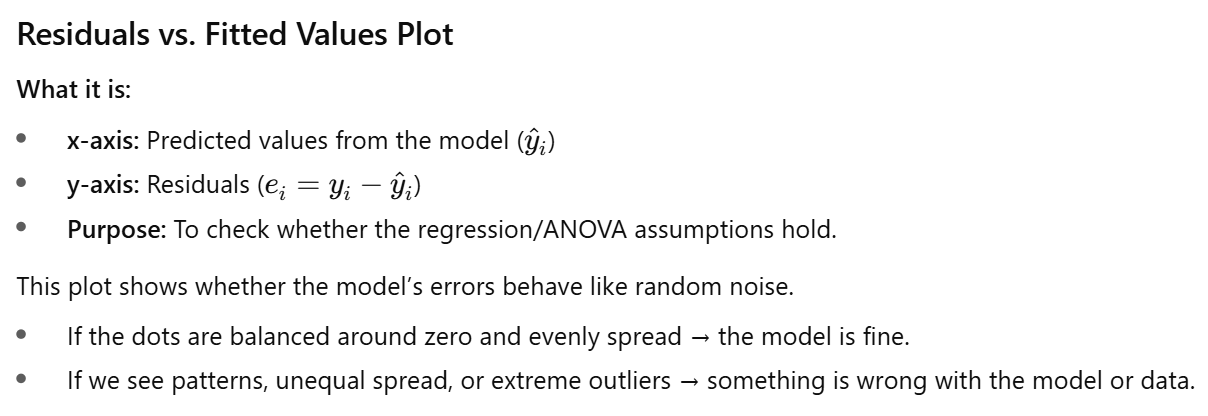

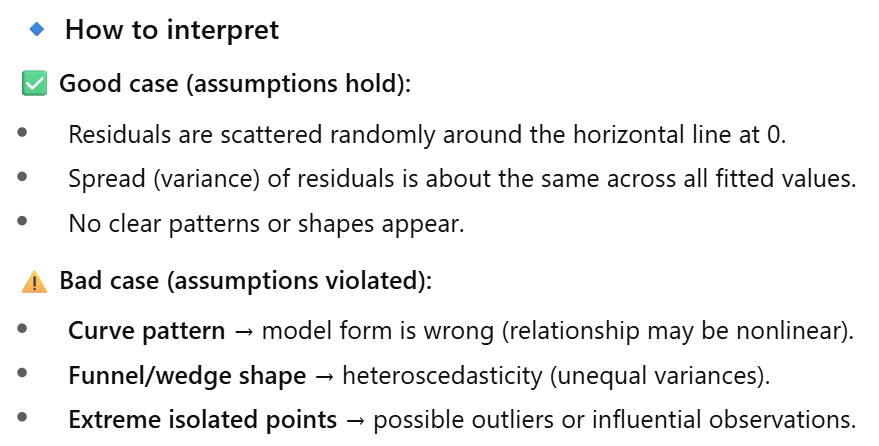

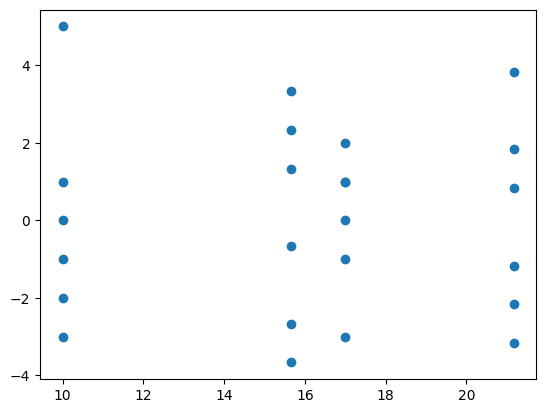

In [ ]:
# Plot fo residuals vs prediction at factor levels (e.g different treatments)
# Usually run with the previous block

plt.scatter(strength_predict, residuals)

plt.show()

In [ ]:
# Standard Error se computation
# se= sqrt(MSE/n) where n is number of obs for each treatment; n=6 in this case
# use the se value as a visual guide in the above plot
# ref. figure 4.12 of Montgomery Intro to SQC 7ed
n=len(Conc5)
se= np.sqrt(model.mse_resid/n)
se


np.float64(1.041499986664533)

Standard Error (SE): 1.041


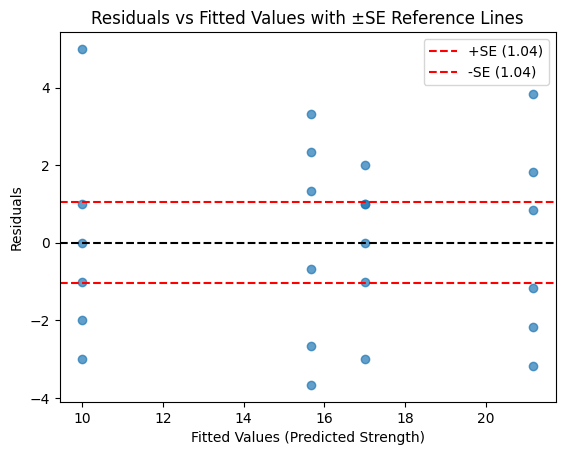

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Residuals and fitted values from your model
residuals = model.resid
strength_predict = model.fittedvalues

# --- Standard Error (SE) ---
n = len(df[df['Conc'] == 5])   # observations per group (here, 6)
se = np.sqrt(model.mse_resid / n)
print(f"Standard Error (SE): {se:.3f}")

# --- Residuals vs Fitted plot ---
plt.scatter(strength_predict, residuals, alpha=0.7)
plt.axhline(0, color="black", linestyle="--")   # center line
plt.axhline(+se, color="red", linestyle="--", label=f"+SE ({se:.2f})")
plt.axhline(-se, color="red", linestyle="--", label=f"-SE ({se:.2f})")

plt.xlabel("Fitted Values (Predicted Strength)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values with ±SE Reference Lines")
plt.legend()
plt.show()


Standard Error (SE): 1.041


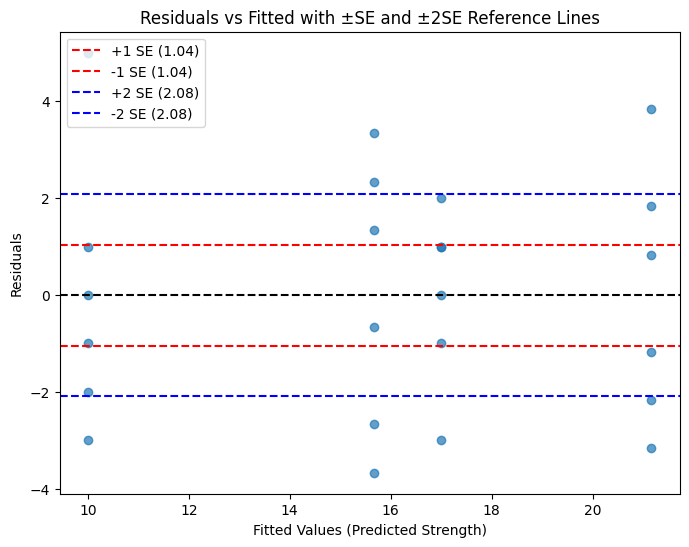

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Residuals and fitted values
residuals = model.resid
strength_predict = model.fittedvalues

# Number of observations per group (here, 6)
n = len(df[df['Conc'] == 5])

# Compute SE
se = np.sqrt(model.mse_resid / n)
print(f"Standard Error (SE): {se:.3f}")

# --- Plot ---
plt.figure(figsize=(8,6))
plt.scatter(strength_predict, residuals, alpha=0.7)

# Central line
plt.axhline(0, color="black", linestyle="--")

# ±SE band
plt.axhline(+se, color="red", linestyle="--", label=f"+1 SE ({se:.2f})")
plt.axhline(-se, color="red", linestyle="--", label=f"-1 SE ({se:.2f})")

# ±2SE band
plt.axhline(+2*se, color="blue", linestyle="--", label=f"+2 SE ({2*se:.2f})")
plt.axhline(-2*se, color="blue", linestyle="--", label=f"-2 SE ({2*se:.2f})")

plt.xlabel("Fitted Values (Predicted Strength)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted with ±SE and ±2SE Reference Lines")
plt.legend(loc="upper left")
plt.show()


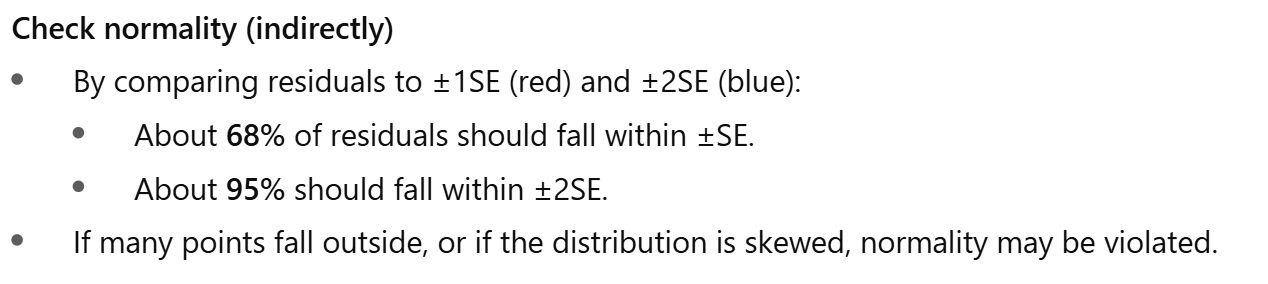

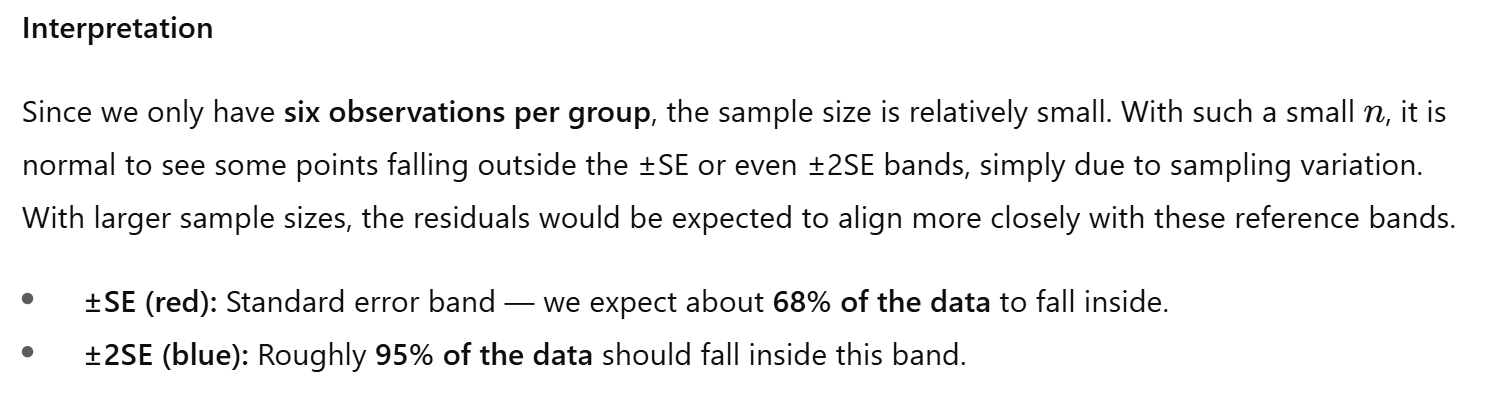

# Box Plot

/tmp/ipython-input-73957430.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data2,


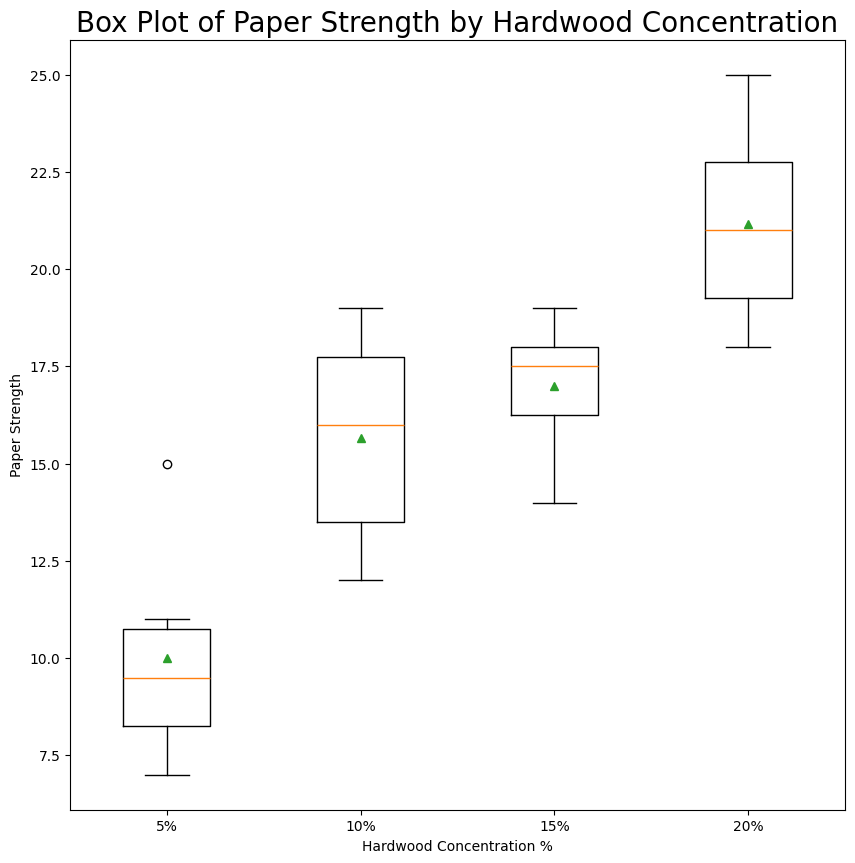

In [ ]:
# Box plots by factor levels'

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Paper Strength by Hardwood Concentration", fontsize= 20)
ax.set

#data2 = [df['Strength'][df['Conc'] == 5],
#             df['Strength'][df['Conc'] == 10],
#             df['Strength'][df['Conc'] == 15],
#             df['Strength'][df['Conc'] == 20]]

data2=[Conc5, Conc10, Conc15, Conc20]

ax.boxplot(data2,
           labels= ['5%', '10%', '15%', '20%'],
           showmeans= True)

plt.xlabel("Hardwood Concentration %")
plt.ylabel("Paper Strength")

plt.show()

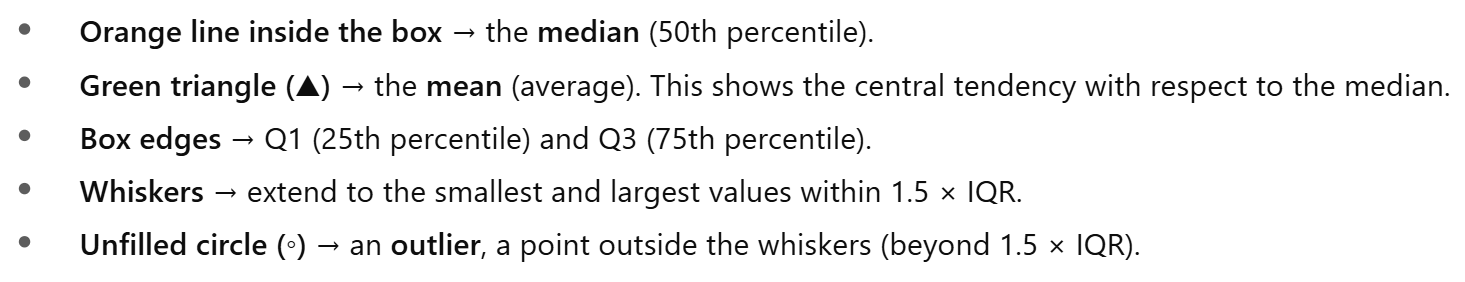

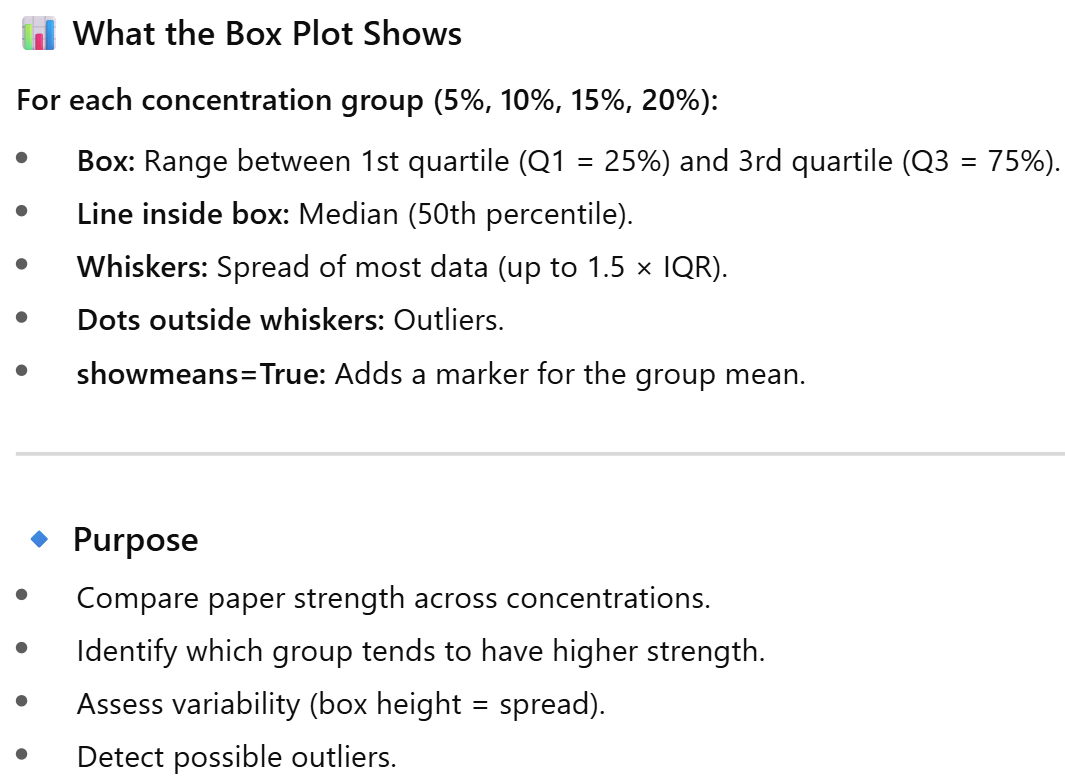

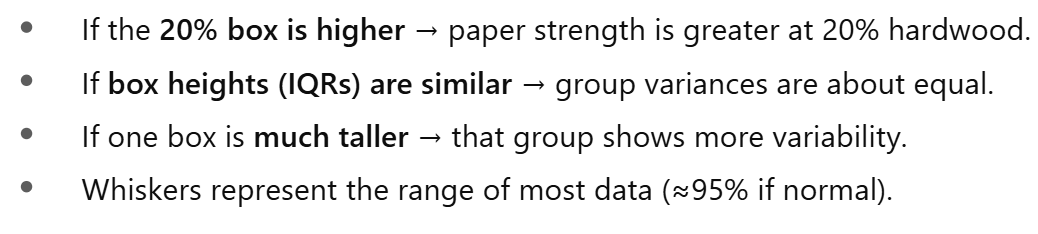

# Multiple Comparison Tests

Tukey LSD (Least Significant Difference) q table (or studentized range q)
https://real-statistics.com/statistics-tables/studentized-range-q-table/

In summary, the Tukey LSD method is used to perform pairwise comparisons of group means in an ANOVA when you have multiple groups and have found a significant overall difference. It helps identify which specific pairs of groups have significantly different means, allowing you to make more detailed and precise conclusions about the differences among the groups.
Ref.
https://online.stat.psu.edu/stat503/lesson/3/3.3
https://www2.stat.duke.edu/courses/Spring98/sta110c/qtable.html







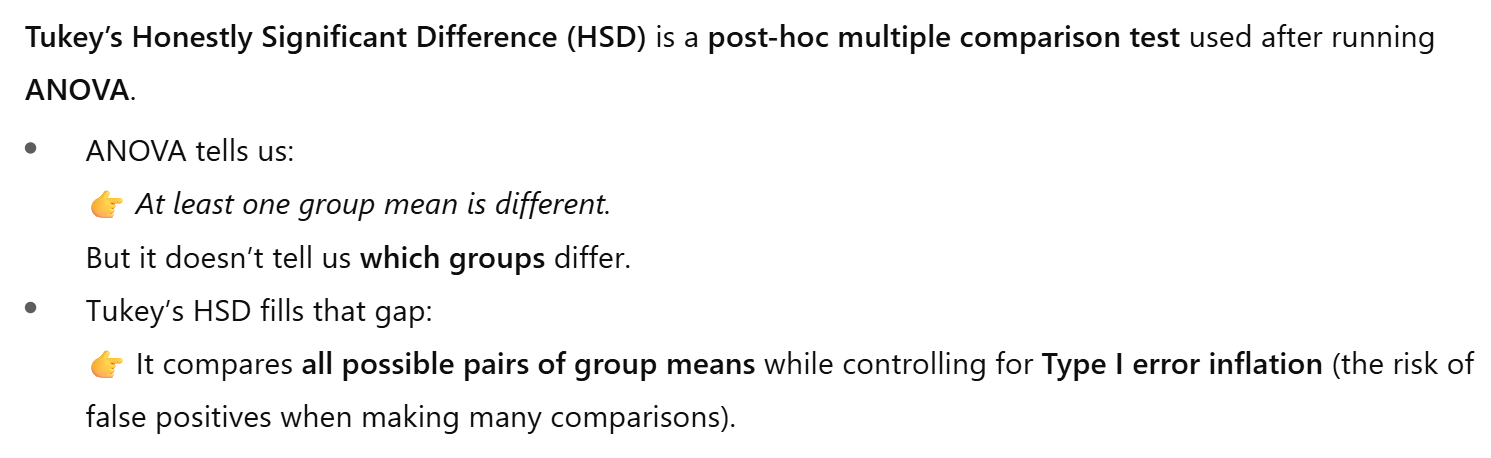

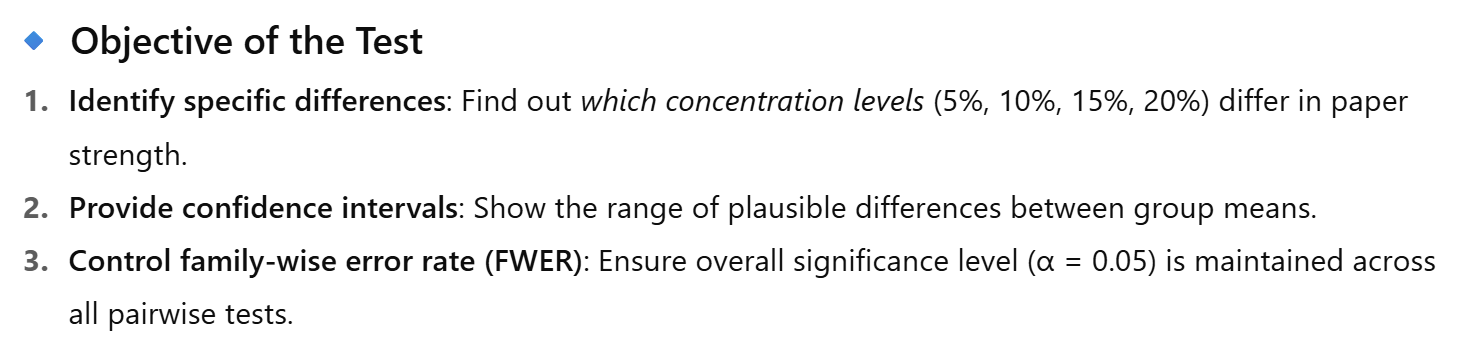

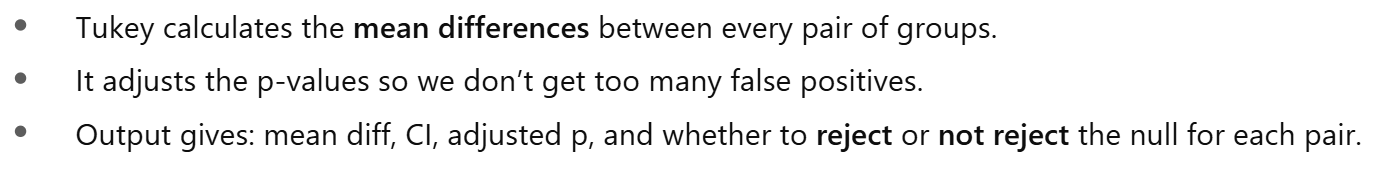

In [ ]:
# Multiple comparison test
# ref https://www.statsmodels.org/devel/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html
#Tukey Honestly Significat Difference (HSD)
comp = mc.MultiComparison(df['Strength'], df['Conc'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
5,10,5.6667,0.0051,1.5441,9.7892,True
5,15,7.0,0.0007,2.8774,11.1226,True
5,20,11.1667,0.0,7.0441,15.2892,True
10,15,1.3333,0.8022,-2.7892,5.4559,False
10,20,5.5,0.0066,1.3774,9.6226,True
15,20,4.1667,0.047,0.0441,8.2892,True


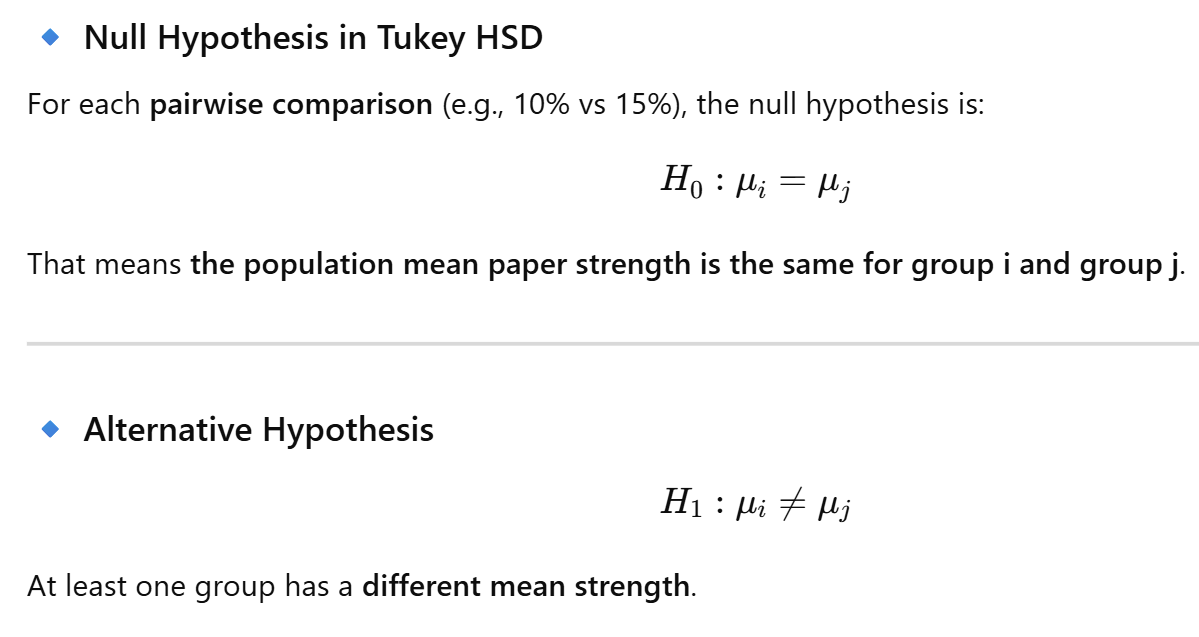

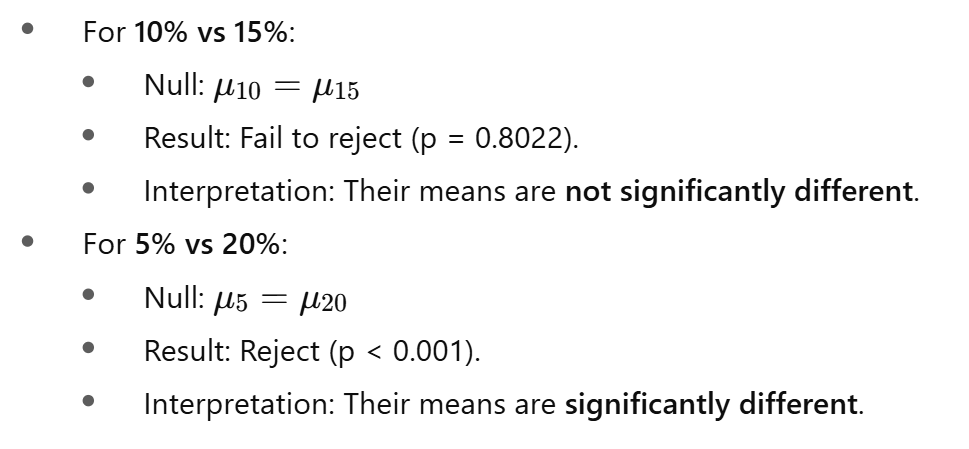

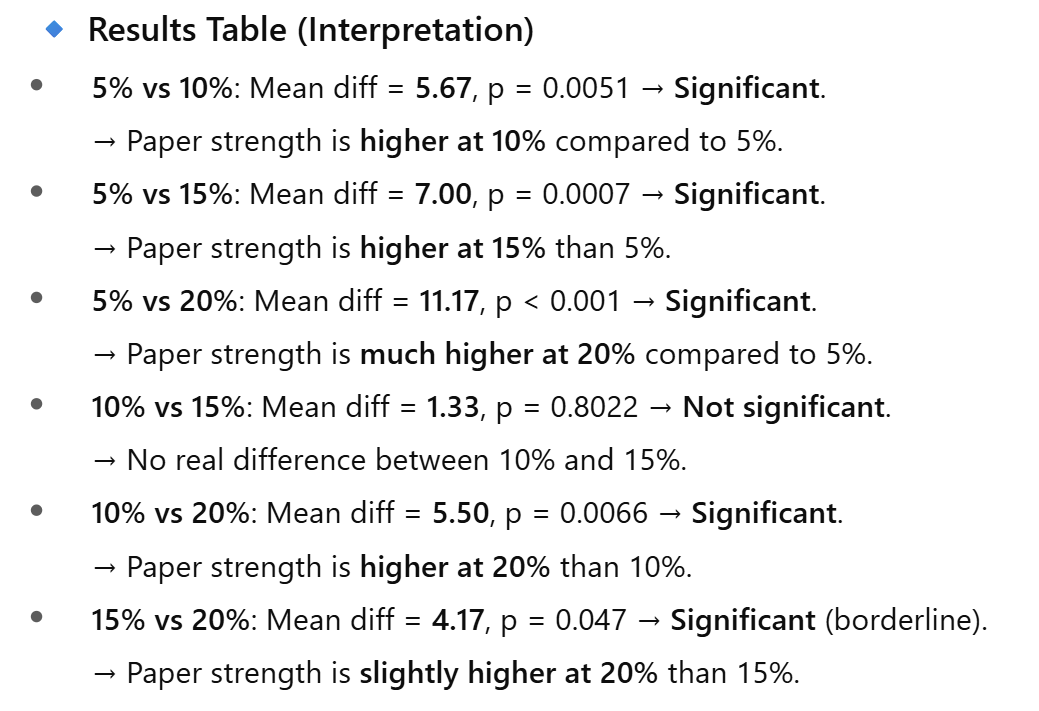

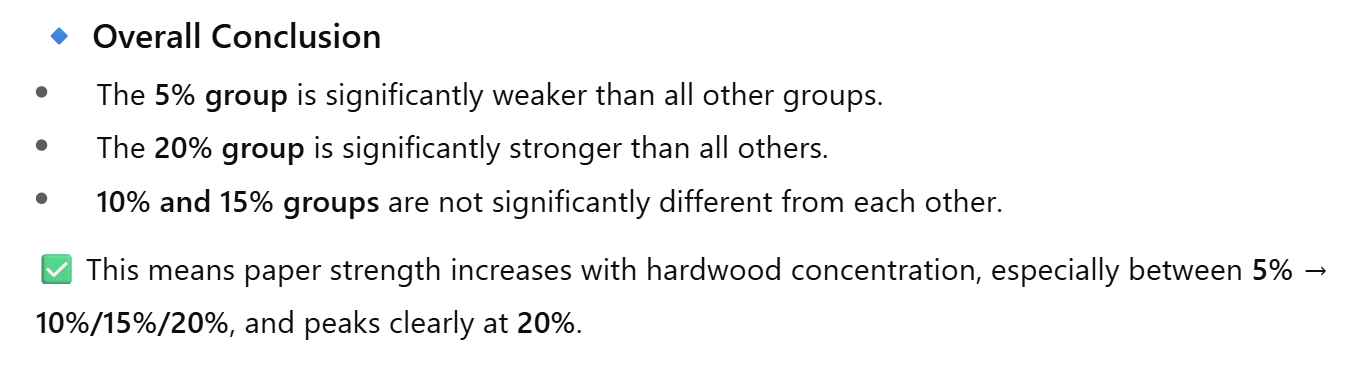

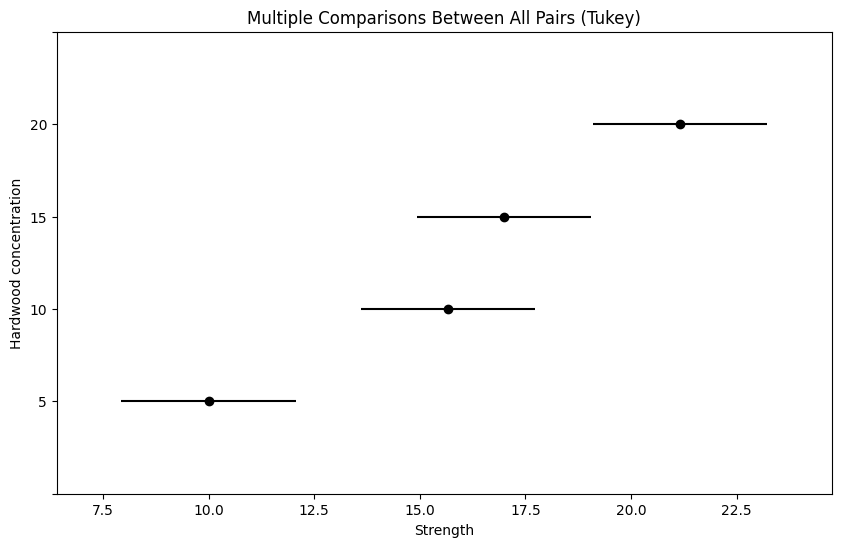

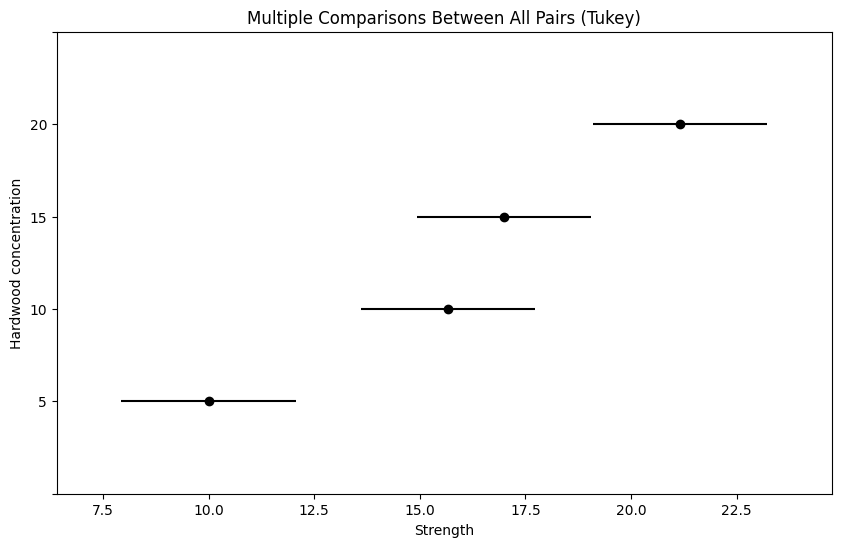

In [ ]:
#visualize the Tukey test
post_hoc_res.plot_simultaneous(ylabel= "Hardwood concentration", xlabel= "Strength")

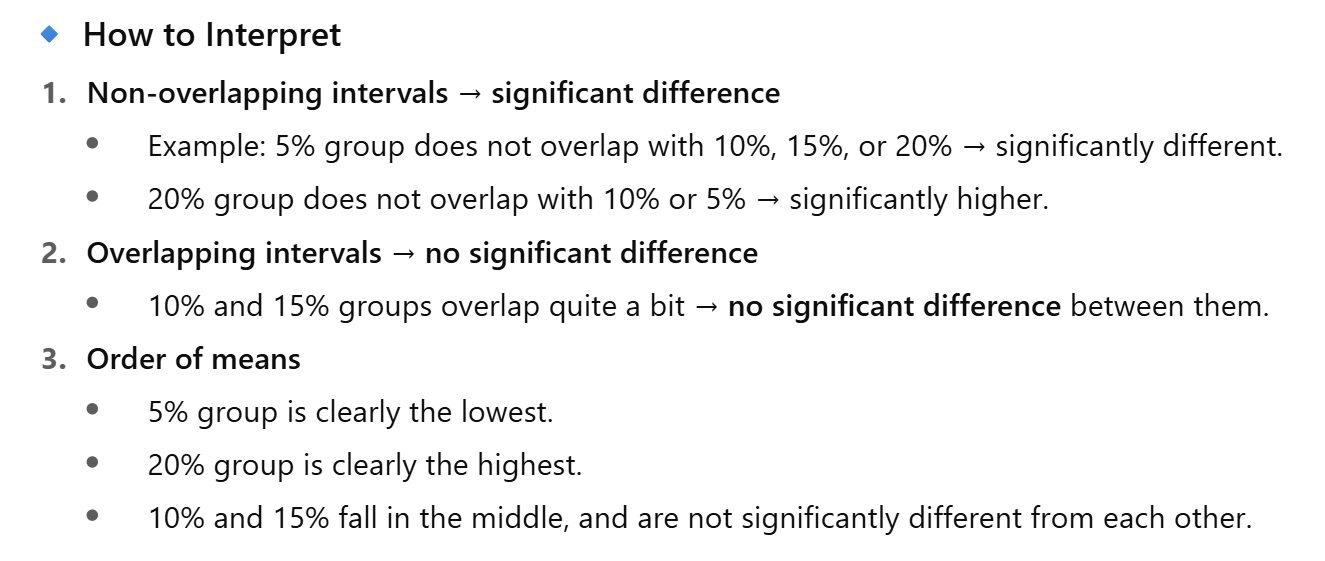